In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def loadSimpleData():
    dataMat=np.matrix(
    [
        [1.,2.1],
        [1.5,1.6],
        [1.3,1.],
        [1.,1.],
        [2.,1.]
    ])
    classLabels=[1.0,1.0,-1.0,-1.0,1.0]
    return dataMat,classLabels

In [3]:
def showDataSet(dataMat,labelMat):
    data_plus=[]
    data_minus=[]
    for i in range(len(dataMat)):
        if labelMat[i]>0:
            data_plus.append(dataMat[i])
        else:
            data_minus.append(dataMat[i])
    data_plus_np=np.array(data_plus)
    data_minus_np=np.array(data_minus)
    plt.scatter(np.transpose(data_plus_np)[0],np.transpose(data_plus_np)[1])
    plt.scatter(np.transpose(data_minus_np)[0],np.transpose(data_minus_np)[1])

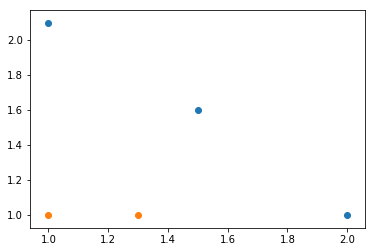

In [4]:
dataArr,classLabels=loadSimpleData()
showDataSet(dataArr,classLabels)

In [10]:
def stumpClassify(dataMatrix,dimen,threshVal,threshIneq):
    retArray=np.ones((np.shape(dataMatrix)[0],1))
    if threshIneq=='lt':
        retArray[dataMatrix[:,dimen]<=threshVal]=-1.0
    else:
        retArray[dataMatrix[:,dimen]>threshVal]=-1.0
    return retArray
def buildStump(dataArr,classLabels,D):
    dataMatrix=np.mat(dataArr)
    labelMat=np.mat(classLabels).T
    m,n=np.shape(dataMatrix)
    numSteps=10.0
    bestStump={}
    bestClassEst=np.mat(np.zeros((m,1)))
    minError=float('inf')
    for i in range(n):
        rangeMin=dataMatrix[:,i].min()
        rangeMax=dataMatrix[:,i].max()
        stepSize=(rangeMax-rangeMin)/numSteps
        for j in range(-1,int(numSteps)+1):
            for inequal in ['lt','gt']:
                threshVal=(rangeMin+float(j)*stepSize)
                predictedVals=stumpClassify(dataMatrix,i,threshVal,inequal)
                errArr=np.mat(np.ones((m,1)))
                errArr[predictedVals==labelMat]=0
                weightedError=D.T*errArr
                print("split: dim %d, thresh %.2f, thresh ineqal: %s, the weighted error is %.3f" % (i, threshVal, inequal, weightedError))
                if weightedError<minError:
                    minError=weightedError
                    bestClassEst=predictedVals.copy()
                    bestStump['dim']=i
                    bestStump['thresh']=threshVal
                    bestStump['ineq']=inequal
    return bestStump,minError,bestClassEst

In [13]:
dataArr,classLabels=loadSimpleData()
D=np.mat(np.ones((5,1))/5)
bestStump,minError,bestClassEst=buildStump(dataArr,classLabels,D)
print('bestStump:\n', bestStump)
print('minError:\n', minError)
print('bestClasEst:\n', bestClassEst)

split: dim 0, thresh 0.90, thresh ineqal: lt, the weighted error is 0.400
split: dim 0, thresh 0.90, thresh ineqal: gt, the weighted error is 0.600
split: dim 0, thresh 1.00, thresh ineqal: lt, the weighted error is 0.400
split: dim 0, thresh 1.00, thresh ineqal: gt, the weighted error is 0.600
split: dim 0, thresh 1.10, thresh ineqal: lt, the weighted error is 0.400
split: dim 0, thresh 1.10, thresh ineqal: gt, the weighted error is 0.600
split: dim 0, thresh 1.20, thresh ineqal: lt, the weighted error is 0.400
split: dim 0, thresh 1.20, thresh ineqal: gt, the weighted error is 0.600
split: dim 0, thresh 1.30, thresh ineqal: lt, the weighted error is 0.200
split: dim 0, thresh 1.30, thresh ineqal: gt, the weighted error is 0.800
split: dim 0, thresh 1.40, thresh ineqal: lt, the weighted error is 0.200
split: dim 0, thresh 1.40, thresh ineqal: gt, the weighted error is 0.800
split: dim 0, thresh 1.50, thresh ineqal: lt, the weighted error is 0.400
split: dim 0, thresh 1.50, thresh ineq

In [19]:
def adaBoostTrainDS(dataArr,classLabels,numIt=40):
    weakClassArr=[]
    m=np.shape(dataArr)[0]
    D=np.mat(np.zeros((m,1))/m)
    aggClassEst=np.mat(np.zeros((m,1)))
    for i in range(numIt):
        bestStump,error,classEst=buildStump(dataArr,classLabels,D)
        print('D:',D.T)
        alpha=float(0.5*np.log((1.0-error)/max(error,1e-6)))
        bestStump['alpha']=alpha
        weakClassArr.append(bestStump)
        print('classEst:',classEst.T)
        expon=np.multiply(-1*alpha*np.mat(classLabels).T,classEst)
        D=np.multiply(D,np.exp(expon))
        D=D/D.sum()
        aggClassEst+=alpha*classEst
        aggErrors=np.multiply(np.sign(aggClassEst)!=np.mat(classLabels).T,np.ones((m,1)))
        erroRate=aggErrors.sum()/m
        if erroRate==0.0:
            break
    return weakClassArr,aggClassEst

In [22]:
def adaClassify(daToClass,classifierArr):
    dataMatrix=np.mat(daToClass)
    m=np.shape(dataMatrix)[0]
    aggClassEst=np.mat(np.zeros((m,1)))
    for i in range(len(classifierArr)):
        classEst=stumpClassify(dataMatrix,classifierArr[i]['dim'],classifierArr[i]['thresh'],classifierArr[i]['ineq'])
        aggClassEst+=classifierArr[i]['alpha']*classEst
        print(aggClassEst)
    return np.sign(aggClassEst)

In [24]:
dataArr,classLabels = loadSimpleData()
weakClassArr, aggClassEst = adaBoostTrainDS(dataArr, classLabels)
print(weakClassArr)
# print(adaClassify([[0,0],[5,5]], weakClassArr))

split: dim 0, thresh 0.90, thresh ineqal: lt, the weighted error is 0.000
split: dim 0, thresh 0.90, thresh ineqal: gt, the weighted error is 0.000
split: dim 0, thresh 1.00, thresh ineqal: lt, the weighted error is 0.000
split: dim 0, thresh 1.00, thresh ineqal: gt, the weighted error is 0.000
split: dim 0, thresh 1.10, thresh ineqal: lt, the weighted error is 0.000
split: dim 0, thresh 1.10, thresh ineqal: gt, the weighted error is 0.000
split: dim 0, thresh 1.20, thresh ineqal: lt, the weighted error is 0.000
split: dim 0, thresh 1.20, thresh ineqal: gt, the weighted error is 0.000
split: dim 0, thresh 1.30, thresh ineqal: lt, the weighted error is 0.000
split: dim 0, thresh 1.30, thresh ineqal: gt, the weighted error is 0.000
split: dim 0, thresh 1.40, thresh ineqal: lt, the weighted error is 0.000
split: dim 0, thresh 1.40, thresh ineqal: gt, the weighted error is 0.000
split: dim 0, thresh 1.50, thresh ineqal: lt, the weighted error is 0.000
split: dim 0, thresh 1.50, thresh ineq

C:\Users\GDD\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app
C:\Users\GDD\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in less
C:\Users\GDD\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in sign


split: dim 0, thresh 1.90, thresh ineqal: gt, the weighted error is nan
split: dim 0, thresh 2.00, thresh ineqal: lt, the weighted error is nan
split: dim 0, thresh 2.00, thresh ineqal: gt, the weighted error is nan
split: dim 1, thresh 0.89, thresh ineqal: lt, the weighted error is nan
split: dim 1, thresh 0.89, thresh ineqal: gt, the weighted error is nan
split: dim 1, thresh 1.00, thresh ineqal: lt, the weighted error is nan
split: dim 1, thresh 1.00, thresh ineqal: gt, the weighted error is nan
split: dim 1, thresh 1.11, thresh ineqal: lt, the weighted error is nan
split: dim 1, thresh 1.11, thresh ineqal: gt, the weighted error is nan
split: dim 1, thresh 1.22, thresh ineqal: lt, the weighted error is nan
split: dim 1, thresh 1.22, thresh ineqal: gt, the weighted error is nan
split: dim 1, thresh 1.33, thresh ineqal: lt, the weighted error is nan
split: dim 1, thresh 1.33, thresh ineqal: gt, the weighted error is nan
split: dim 1, thresh 1.44, thresh ineqal: lt, the weighted error

split: dim 0, thresh 1.70, thresh ineqal: lt, the weighted error is nan
split: dim 0, thresh 1.70, thresh ineqal: gt, the weighted error is nan
split: dim 0, thresh 1.80, thresh ineqal: lt, the weighted error is nan
split: dim 0, thresh 1.80, thresh ineqal: gt, the weighted error is nan
split: dim 0, thresh 1.90, thresh ineqal: lt, the weighted error is nan
split: dim 0, thresh 1.90, thresh ineqal: gt, the weighted error is nan
split: dim 0, thresh 2.00, thresh ineqal: lt, the weighted error is nan
split: dim 0, thresh 2.00, thresh ineqal: gt, the weighted error is nan
split: dim 1, thresh 0.89, thresh ineqal: lt, the weighted error is nan
split: dim 1, thresh 0.89, thresh ineqal: gt, the weighted error is nan
split: dim 1, thresh 1.00, thresh ineqal: lt, the weighted error is nan
split: dim 1, thresh 1.00, thresh ineqal: gt, the weighted error is nan
split: dim 1, thresh 1.11, thresh ineqal: lt, the weighted error is nan
split: dim 1, thresh 1.11, thresh ineqal: gt, the weighted error

In [25]:
def loadDataSet(fileName):
    numFeat = len((open(fileName).readline().split('\t')))
    dataMat = []; labelMat = []
    fr = open(fileName)
    for line in fr.readlines():
        lineArr = []
        curLine = line.strip().split('\t')
        for i in range(numFeat - 1):
            lineArr.append(float(curLine[i]))
        dataMat.append(lineArr)
        labelMat.append(float(curLine[-1]))
    return dataMat, labelMat
def stumpClassify(dataMatrix,dimen,threshVal,threshIneq):
    """
    单层决策树分类函数
    Parameters:
        dataMatrix - 数据矩阵
        dimen - 第dimen列，也就是第几个特征
        threshVal - 阈值
        threshIneq - 标志
    Returns:
        retArray - 分类结果
    """
    retArray = np.ones((np.shape(dataMatrix)[0],1))                #初始化retArray为1
    if threshIneq == 'lt':
        retArray[dataMatrix[:,dimen] <= threshVal] = -1.0         #如果小于阈值,则赋值为-1
    else:
        retArray[dataMatrix[:,dimen] > threshVal] = -1.0         #如果大于阈值,则赋值为-1
    return retArray
    
def buildStump(dataArr,classLabels,D):
    """
    找到数据集上最佳的单层决策树
    Parameters:
        dataArr - 数据矩阵
        classLabels - 数据标签
        D - 样本权重
    Returns:
        bestStump - 最佳单层决策树信息
        minError - 最小误差
        bestClasEst - 最佳的分类结果
    """
    dataMatrix = np.mat(dataArr); labelMat = np.mat(classLabels).T
    m,n = np.shape(dataMatrix)
    numSteps = 10.0; bestStump = {}; bestClasEst = np.mat(np.zeros((m,1)))
    minError = float('inf')                                                        #最小误差初始化为正无穷大
    for i in range(n):                                                            #遍历所有特征
        rangeMin = dataMatrix[:,i].min(); rangeMax = dataMatrix[:,i].max()        #找到特征中最小的值和最大值
        stepSize = (rangeMax - rangeMin) / numSteps                                #计算步长
        for j in range(-1, int(numSteps) + 1):                                     
            for inequal in ['lt', 'gt']:                                          #大于和小于的情况，均遍历。lt:less than，gt:greater than
                threshVal = (rangeMin + float(j) * stepSize)                     #计算阈值
                predictedVals = stumpClassify(dataMatrix, i, threshVal, inequal)#计算分类结果
                errArr = np.mat(np.ones((m,1)))                                 #初始化误差矩阵
                errArr[predictedVals == labelMat] = 0                             #分类正确的,赋值为0
                weightedError = D.T * errArr                                      #计算误差
                # print("split: dim %d, thresh %.2f, thresh ineqal: %s, the weighted error is %.3f" % (i, threshVal, inequal, weightedError))
                if weightedError < minError:                                     #找到误差最小的分类方式
                    minError = weightedError
                    bestClasEst = predictedVals.copy()
                    bestStump['dim'] = i
                    bestStump['thresh'] = threshVal
                    bestStump['ineq'] = inequal
    return bestStump, minError, bestClasEst

def adaBoostTrainDS(dataArr, classLabels, numIt = 40):
    """
    使用AdaBoost算法提升弱分类器性能
    Parameters:
        dataArr - 数据矩阵
        classLabels - 数据标签
        numIt - 最大迭代次数
    Returns:
        weakClassArr - 训练好的分类器
        aggClassEst - 类别估计累计值
    """
    weakClassArr = []
    m = np.shape(dataArr)[0]
    D = np.mat(np.ones((m, 1)) / m)                                            #初始化权重
    aggClassEst = np.mat(np.zeros((m,1)))
    for i in range(numIt):
        bestStump, error, classEst = buildStump(dataArr, classLabels, D)     #构建单层决策树
        # print("D:",D.T)
        alpha = float(0.5 * np.log((1.0 - error) / max(error, 1e-16)))         #计算弱学习算法权重alpha,使error不等于0,因为分母不能为0
        bestStump['alpha'] = alpha                                          #存储弱学习算法权重
        weakClassArr.append(bestStump)                                      #存储单层决策树
        # print("classEst: ", classEst.T)
        expon = np.multiply(-1 * alpha * np.mat(classLabels).T, classEst)     #计算e的指数项
        D = np.multiply(D, np.exp(expon))                                      
        D = D / D.sum()                                                        #根据样本权重公式，更新样本权重
        #计算AdaBoost误差，当误差为0的时候，退出循环
        aggClassEst += alpha * classEst                                      #计算类别估计累计值                                
        # print("aggClassEst: ", aggClassEst.T)
        aggErrors = np.multiply(np.sign(aggClassEst) != np.mat(classLabels).T, np.ones((m,1)))     #计算误差
        errorRate = aggErrors.sum() / m
        # print("total error: ", errorRate)
        if errorRate == 0.0: break                                             #误差为0，退出循环
    return weakClassArr, aggClassEst

def adaClassify(datToClass,classifierArr):
    """
    AdaBoost分类函数
    Parameters:
        datToClass - 待分类样例
        classifierArr - 训练好的分类器
    Returns:
        分类结果
    """
    dataMatrix = np.mat(datToClass)
    m = np.shape(dataMatrix)[0]
    aggClassEst = np.mat(np.zeros((m,1)))
    for i in range(len(classifierArr)):                                        #遍历所有分类器，进行分类
        classEst = stumpClassify(dataMatrix, classifierArr[i]['dim'], classifierArr[i]['thresh'], classifierArr[i]['ineq'])            
        aggClassEst += classifierArr[i]['alpha'] * classEst
        # print(aggClassEst)
    return np.sign(aggClassEst)

In [27]:
dataArr, LabelArr = loadDataSet('horseColicTraining2.txt')
weakClassArr, aggClassEst = adaBoostTrainDS(dataArr, LabelArr)
testArr, testLabelArr = loadDataSet('horseColicTest2.txt')
print(weakClassArr)
predictions = adaClassify(dataArr, weakClassArr)
errArr = np.mat(np.ones((len(dataArr), 1)))
print('训练集的错误率:%.3f%%' % float(errArr[predictions != np.mat(LabelArr).T].sum() / len(dataArr) * 100))
predictions = adaClassify(testArr, weakClassArr)
errArr = np.mat(np.ones((len(testArr), 1)))
print('测试集的错误率:%.3f%%' % float(errArr[predictions != np.mat(testLabelArr).T].sum() / len(testArr) * 100))

[{'dim': 9, 'thresh': 3.0, 'ineq': 'gt', 'alpha': 0.4616623792657674}, {'dim': 17, 'thresh': 52.5, 'ineq': 'gt', 'alpha': 0.31248245042467104}, {'dim': 3, 'thresh': 55.199999999999996, 'ineq': 'gt', 'alpha': 0.2868097320169577}, {'dim': 18, 'thresh': 62.300000000000004, 'ineq': 'lt', 'alpha': 0.23297004638939514}, {'dim': 10, 'thresh': 0.0, 'ineq': 'lt', 'alpha': 0.19803846151213736}, {'dim': 5, 'thresh': 2.0, 'ineq': 'gt', 'alpha': 0.18847887349020642}, {'dim': 12, 'thresh': 1.2, 'ineq': 'lt', 'alpha': 0.1522736899747682}, {'dim': 7, 'thresh': 1.2, 'ineq': 'gt', 'alpha': 0.15510870821690495}, {'dim': 5, 'thresh': 0.0, 'ineq': 'lt', 'alpha': 0.1353619735335938}, {'dim': 4, 'thresh': 28.799999999999997, 'ineq': 'lt', 'alpha': 0.12521587326132094}, {'dim': 11, 'thresh': 2.0, 'ineq': 'gt', 'alpha': 0.1334764812820768}, {'dim': 9, 'thresh': 4.0, 'ineq': 'lt', 'alpha': 0.14182243253771037}, {'dim': 14, 'thresh': 0.0, 'ineq': 'gt', 'alpha': 0.10264268449708046}, {'dim': 0, 'thresh': 1.0, 'in

In [28]:
import numpy as np
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [29]:
def loadDataSet(fileName):
    numFeat = len((open(fileName).readline().split('\t')))
    dataMat = []; labelMat = []
    fr = open(fileName)
    for line in fr.readlines():
        lineArr = []
        curLine = line.strip().split('\t')
        for i in range(numFeat - 1):
            lineArr.append(float(curLine[i]))
        dataMat.append(lineArr)
        labelMat.append(float(curLine[-1]))
    return dataMat, labelMat

In [34]:
dataArr, classLabels = loadDataSet('horseColicTraining2.txt')
testArr, testLabelArr = loadDataSet('horseColicTest2.txt')
bdt=AdaBoostClassifier(DecisionTreeClassifier(max_depth=2),algorithm='SAMME',n_estimators=10)
bdt.fit(dataArr,classLabels)
predictions=bdt.predict(dataArr)
errArr=np.mat(np.ones((len(dataArr),1)))
print('训练集的错误率:%.3f%%'%float(errArr[predictions!=classLabels].sum()/len(dataArr)*100))
errArr=np.mat(np.ones((len(testArr),1)))
predictions=bdt.predict(testArr)
arr=bdt.score(testArr,testLabelArr)
print(arr)
print('训练集的错误率:%.3f%%'%float(errArr[predictions!=testLabelArr].sum()/len(testArr)*100))

训练集的错误率:16.054%
0.8208955223880597
训练集的错误率:17.910%


In [35]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

In [52]:
def plotROC(predStrengths,classLabels):
    front=FontProperties(fname=r'c:\windows\fonts\simsuu.ttc',size=14)
    cur=(1.0,1.0)
    ySum=0.0
    numPosClas=np.sum(np.array(classLabels)==1.0)
    yStep=1/float(numPosClas)
    xStep=1/float(len(classLabels)-numPosClas)
    
    sortedIndicies=predStrengths.argsort()
    print(sortedIndicies)
    fig=plt.figure()
    fig.clf()
    ax=plt.subplot(111)
    for index in sortedIndicies.tolist()[0]:
        if classLabels[index]==1.0:
            delX=0
            delY=yStep
        else:
            delX=xStep
            delY=0
            ySum+=cur[1]
        ax.plot([cur[0],cur[0]-delX],[cur[1],cur[1]-delY],c='b')
        cur=(cur[0]-delX,cur[1]-delY)
    ax.plot([0,1],[0,1],'b--')
#     plt.title('AdaBoost马疝病检测系统的ROC曲线', FontProperties = font)
#     plt.xlabel('假阳率', FontProperties = font)
#     plt.ylabel('真阳率', FontProperties = font)
    ax.axis([0,1,0,1])
    print('AUC面积:',ySum*xStep)

[[-0.646419    0.53886223  0.91726555  0.21712009 -0.69768794  1.22181293
   1.22748297  0.58145314 -0.40165729  0.03508613  0.27123572  0.59407783
   1.53203035  0.64819347  1.04739323 -0.40165729 -1.02662219  0.5606821
   0.34364609 -0.40784481 -0.02469954  1.53203035  1.1676973   1.0995114
   0.73717581  0.23749438  0.52166747  0.85052522  0.5606821   1.69342306
  -1.02662219 -0.03331166  0.95841088  0.6538635  -0.40165729 -1.58160132
  -0.32315478 -0.69921001  1.22748297  0.23749438 -1.58160132  0.23749438
  -0.03331166 -0.49069632 -0.81111385 -1.58160132 -1.27705394  1.22748297
  -0.10329743 -1.33116957  0.91726555  0.59407783  0.91726555  0.5606821
   0.20691998  0.27123572  0.5606821  -0.02469954 -0.70343447 -1.58160132
   1.1676973   0.95841088 -0.37284836 -0.19233647  0.21712009  0.68306018
   0.18462128  1.53203035  0.20077111  1.22748297  0.18537621  1.53203035
  -0.01293737 -0.32647673  0.5606821  -0.03331166  1.31646531  1.69342306
  -0.07846957  0.02322857 -0.70620467  1.

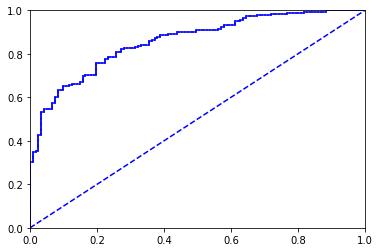

In [53]:
dataArr, LabelArr = loadDataSet('horseColicTraining2.txt')
weakClassArr, aggClassEst = adaBoostTrainDS(dataArr, LabelArr, 10)
print(aggClassEst.T)
plotROC(aggClassEst.T, LabelArr)